In [1]:
import pandas as pd
import numpy as np

# 1. 의사결정나무(Decision Tree)

- 풍속을 threshold 값에 따라 분리되는 의사결정나무 함수 생성

In [28]:
def binary_tree(data, threshold):
    #초기화
    yes, no = [], []
    
    # data로부터 값마다 비교하기 위한 반복문
    for wind in data['풍속']:

        # threshold 값과 비교하기 위해 분리
        if wind > threshold:
            yes.append(wind)
        else:
            no.append(wind)

        # 예측 결과를 데이터 프레임 형태로 저장
        data_yes = pd.DataFrame({'풍속': yes, '예상지연여부': ['Yes']*len(yes)})
        data_no = pd.DataFrame({'풍속': no, '예상지연여부': ['No']*len(no)})
        
    return data_no.append(data_yes, ignore_index=True)

In [29]:
# 풍속에 따른 항공지연 데이터
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5]
Delay  = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']

data = pd.DataFrame({'풍속': Wind, '예상지연여부': Delay})
data

,풍속,예상지연여부
0,1.0,No
1,1.5,No
2,2.5,No
3,5.0,Yes
4,5.5,Yes
5,6.5,Yes


In [30]:
"""
1. binary_tree 모델을 사용하여 항공 지연 여부를 예측합니다.
   data의 지연 여부와 예상 지연 여부가 같은 값이 나오도록 의사결정나무의 
   결과물을 data_pred에 저장하세요.
"""
a = binary_tree(data, 3)
a

,풍속,예상지연여부
0,1.0,No
1,1.5,No
2,2.5,No
3,5.0,Yes
4,5.5,Yes
5,6.5,Yes


## 1.1 Scikit-learn -  iris data

In [49]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

### 1.1.1 데이터 준비

In [41]:
# load iris data
X, Y = load_iris(return_X_y=True)
df = pd.DataFrame(X, columns=['꽃받침길이', '꽃받침넓이', '꽃잎길이','꽃잎넓이'])
df['Target'] = Y
df.head()

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [96]:
# split data set : train, test
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2, random_state=42)

### 1.1.2 모델 생성 및 학습

In [97]:
# 모델 생성 및 학습
DTmodel = DecisionTreeClassifier(max_depth=2)
DTmodel.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=2)

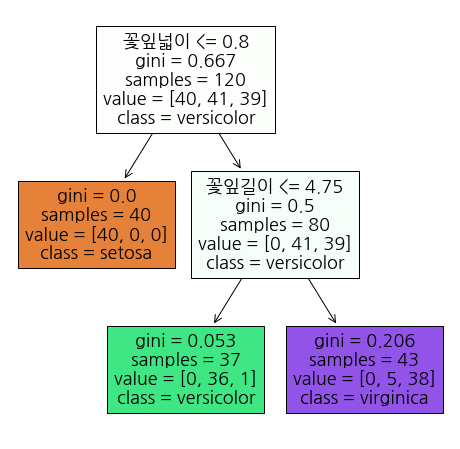

In [60]:
# 학습결과 출력
plt.rc('font', family='NanumGothic')
fig = plt.figure(figsize=(8,8))
tree.plot_tree(DTmodel, 
               feature_names= df.columns,
               class_names= ['setosa', 'versicolor', 'virginica'],
              filled= True
              )
plt.show()

In [61]:
# 검증 데이터 사용
DTmodel.predict(test_X)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 1.2 Scikit-learn - breast cancer data

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import tree
from sklearn.utils.multiclass import unique_labels

from sklearn.metrics import classification_report

### 1.2.1 데이터 준비

In [74]:
# load breast cancer data
X,Y = load_breast_cancer(return_X_y=True)
print('X data shape :', X.shape)
print('Y data shape :', Y.shape)

# split data set : train data, test data
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2, random_state=42)
print('Length : train(%d), test(%d)' %(len(train_X), len(test_X)))

X data shape : (569, 30)
Y data shape : (569,)
Length : train(455), test(114)


### 1.2.2 모델 생성 및 학습

In [78]:
# model build and train
DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_Y)

# predict test data
y_pred= DTmodel.predict(test_X)
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]


Confusion Matrix : 
 [[39  4]
 [ 3 68]]


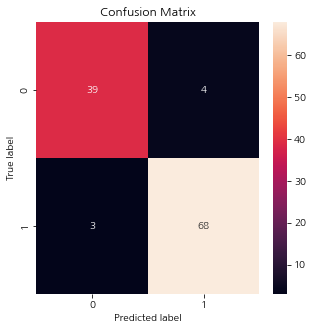

In [82]:
# Confusion Matrix
cm = confusion_matrix(test_Y, y_pred)
print('Confusion Matrix : \n {}'.format(cm))

# 혼동 행렬을 출력합니다
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True)
ax.set(title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
fig.savefig("./data/decistion_tree.png")

### 1.2.3 모델 평가

In [84]:
# Estimate model performance
y_pred_train = DTmodel.predict(train_X)
y_pred_test = DTmodel.predict(test_X)

# Confusion Matrix
cm_train = confusion_matrix(train_Y, y_pred_train)
cm_test = confusion_matrix(test_Y, y_pred_test)

print('train_X confusion matrix \n', cm_train)
print('test_X confusion matrix \n', cm_test)

train_X confusion matrix 
 [[169   0]
 [  0 286]]
test_X confusion matrix 
 [[39  4]
 [ 3 68]]


In [88]:
# accuracy
acc_train = DTmodel.score(train_X, train_Y)
acc_test = DTmodel.score(test_X, test_Y)

# 위와 동일
accuracy_score(train_Y, y_pred_train)
accuracy_score(test_Y, y_pred_test)

print('train_X Accuracy: %.2f' % (acc_train))
print('test_X Accuracy: %.2f' % (acc_test))

train_X Accuracy: 1.00
test_X Accuracy: 0.94


In [91]:
# precision
precision_train = precision_score(train_Y, y_pred_train)
precision_test = precision_score(test_Y, y_pred_test)

print('train_X Precision: %.2f' % (precision_train))
print('test_X Precision: %.2f' % (precision_test))

train_X Precision: 1.00
test_X Precision: 0.94


In [95]:
# recall
recall_train = recall_score(train_Y, y_pred_train)
recall_test = recall_score(test_Y, y_pred_test)

print('train_X Recall: %.2f' % (recall_train))
print('test_X Recall: %.2f' % (recall_test))

train_X Recall: 1.00
test_X Recall: 0.96


- 함수 사용 :Classfication report

In [103]:
print('Train data')
print(classification_report(train_Y, y_pred_train, target_names=['0', '1']))
print('Test data ')
print(classification_report(test_Y, y_pred_test, target_names=['0', '1']))

Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test data 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

